In [1]:
import scipy
import numpy as np
import mpmath as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

sns.set()

## Functions

In [2]:
def calculate_value(dispersion: float, sample_mean: float, alt_mean: float, num_of_values: int) -> float:
    t_value = (sample_mean - alt_mean) * np.sqrt(num_of_values) / np.sqrt(dispersion)
    
    return t_value


def get_critical_value(p: float, is_both_tails: bool = True):
    alpha = p
    
    if not is_both_tails:
        alpha = alpha * 2

    critical_value = (1 - alpha) / 2
    
    return critical_value

def get_laplace_function_value(x: float):
    value = x / np.sqrt(2)
    value = scipy.special.erf(value) / 2

    return value

def get_inverse_laplace_function_value(x: float):
    value = scipy.stats.norm.ppf(x + 0.5)
    
    return value


def calculate_sample_dispersion(x_list) -> float:
    x_list = np.array(x_list)
    x_list = x_list - np.mean(x_list)
    x_list = x_list ** 2
    
    sample_dispersion = np.sum(x_list) / (len(x_list) - 1)
    
    return sample_dispersion
    
    
def calculate_xi_squared(num_of_values: int, sample_dispersion: float, hypothesis_dispersion: float):
    xi_squeared_value  = (num_of_values - 1) * sample_dispersion / hypothesis_dispersion
    
    return xi_squeared_value

def get_probability_density_function_value(xi_squeared_value: float, degree_freedom_num: int = 1):
    probability_density_function_value = scipy.stats.chi2.cdf(xi_squeared_value, degree_freedom_num)
    
    return probability_density_function_value

def get_confidence_interval_value(confidence_value: float, degree_freedom_num: int = 1):
    confidence_interval_value = scipy.stats.distributions.chi2.ppf(
        q=confidence_value, 
        df=degree_freedom_num
    )
    
    return confidence_interval_value
    

## Load iris data

In [3]:
def load_iris_dataset():
    data_iris = datasets.load_iris()

    target_names = data_iris['target_names']
    
    data_iris = pd.DataFrame(
        data=np.c_[
            data_iris['data'],
            data_iris['target'], 
        ],
        columns=data_iris['feature_names'] + ['target']
    )
    
    data_iris['target_names'] = data_iris['target'].apply(
        lambda x: target_names[int(x)]
    )
    
    return data_iris

In [4]:
data_iris = load_iris_dataset()

data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


## EDA

<AxesSubplot:title={'center':'Number of items in each class'}, xlabel='target_names', ylabel='count'>

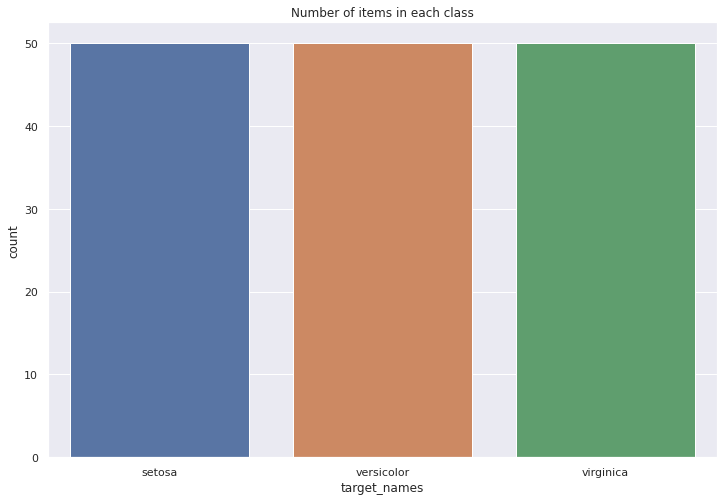

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(f'Number of items in each class')

sns.countplot(x=data_iris['target_names'], ax=ax)

## Create generated data

In [6]:
mu = 6
dispersion = 4
num_of_values = 100

sd = np.sqrt(dispersion)

random_generator = np.random.default_rng()

random_normal_distribution = random_generator.normal(
    loc=mu,
    scale=sd,
    size=num_of_values
)
print(f'random_normal_distribution: \n{random_normal_distribution}')

random_normal_distribution: 
[ 3.96663447  7.85728358  4.69678097  7.86823246  7.1942836   6.07760074
  7.42595942  4.76947801  6.07880394  5.75726683  9.27472223  7.17285085
  4.71734045  4.65451539  7.04545032  6.32639726  3.83122082  7.87430807
  4.78502862  4.63215686  6.52590388  8.91233717  5.20691756  9.12527146
  0.20866044  9.45488452  6.07518844  7.98893136  5.89740055  3.16129611
  5.94113502  6.90102522  3.62494845  5.64855493  5.81543257  5.60536517
  4.95631959  5.36588021  5.59805042  4.75305208  6.22978619  6.86413645
  5.65555732  6.76867031  3.50069624  4.69798922  8.00470072  6.29145917
  4.64446753  5.21573993  3.78439285  6.58437825  5.62973469  4.85406827
  7.766268    3.28452358  7.9817336   6.87584294  7.28207757  5.57597405
 11.10545947  7.50119486  1.65232539  7.34585332  6.5348694   4.57154626
  4.58976846  4.71857127  5.93218701  8.19258997  6.02007106  6.65454859
  6.50336801  4.80707588  6.0765688   5.32236919  4.74386175  4.536419
  5.96337443  5.89862127

<AxesSubplot:title={'center':'Random distribution example'}, ylabel='Count'>

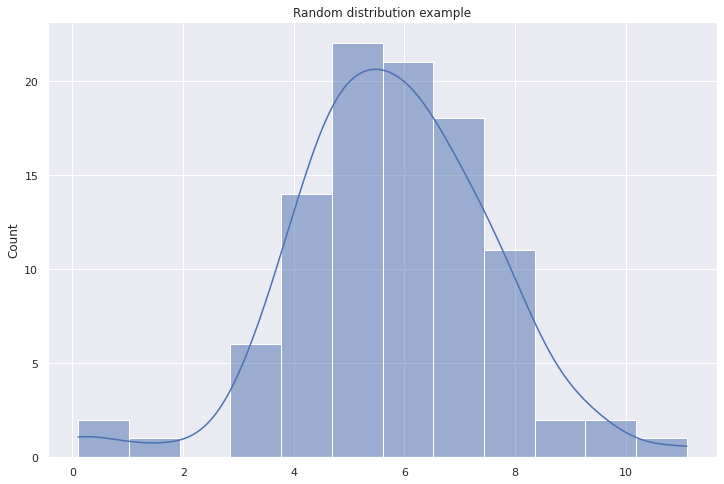

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(f'Random distribution example')

sns.histplot(
    random_normal_distribution,
    kde=True, ax=ax
)

## Pearson test

In [8]:
pvalue_edge = 0.05

def get_expected_freq(distribution_values, data_values):
    expected_frequencies = list()

    for curr_value in data_values:
        expected_pecent = scipy.stats.norm.pdf(
            x=curr_value, 
            loc=mu,
            scale=sd
        )

        expected_frequencies.append(
            len(distribution_values) * expected_pecent
        )
        
    return expected_frequencies

In [9]:
observed_frequencies, data_values = np.histogram(
    a=random_normal_distribution
)
data_values = [((prev_value + value) / 2 )
               for prev_value, value in zip(data_values[:-1], data_values[1:])]

expected_frequencies = get_expected_freq(distribution_values=random_normal_distribution, data_values=data_values)

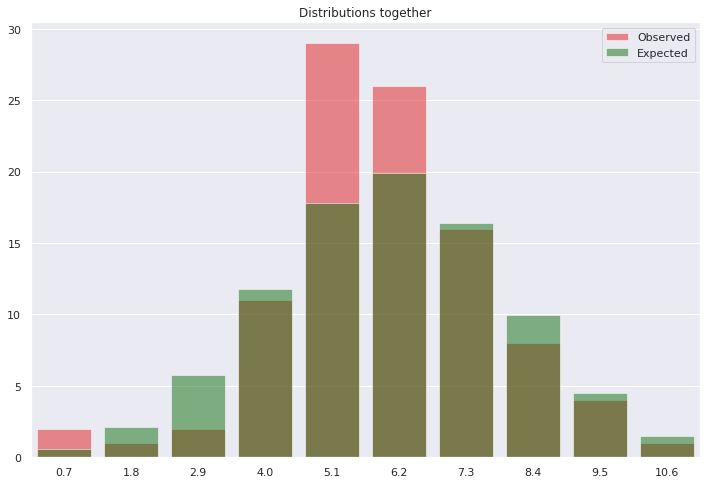

In [10]:
plt.subplots(figsize=(12, 8))
plt.title('Distributions together')

sns.barplot(x=np.round(data_values, 1), y=observed_frequencies, color='red', alpha=0.5, label='Observed')
sns.barplot(x=np.round(data_values, 1), y=expected_frequencies, color='green', alpha=0.5, label='Expected')

plt.legend()

In [11]:
stats_info = scipy.stats.chisquare(
    observed_frequencies, 
    expected_frequencies,
    ddof = 2
)

xi_squeared_value = stats_info.statistic
pvalue = stats_info.pvalue

is_from_normal_distribution = pvalue > pvalue_edge and pvalue < 1 - pvalue_edge

print(f'Xi squeared value: {xi_squeared_value}')
print(f'Is from normal ditribution: {is_from_normal_distribution}')

Xi squeared value: 16.301509981939688
Is from normal ditribution: False


## Kolmogorov criterion 

In [12]:
stats_info = scipy.stats.kstest(
    rvs=observed_frequencies, 
    cdf=expected_frequencies,
)

kolmogorov_value = stats_info.statistic
pvalue = stats_info.pvalue

is_from_normal_distribution = pvalue > pvalue_edge

print(f'Kolmogorov value: {kolmogorov_value}')
print(f'Is from normal ditribution: {is_from_normal_distribution}')

Kolmogorov value: 0.2
Is from normal ditribution: True


## Student's t-test

### Mean values equality

#### Normal distribution values

In [13]:
mu = 6
dispersion = 4

num_of_values1 = 40
num_of_values2 = 60

random_normal_distribution1 = random_generator.normal(
    loc=mu,
    scale=sd,
    size=num_of_values1
)

random_normal_distribution2 = random_generator.normal(
    loc=mu,
    scale=sd,
    size=num_of_values2
)

print(f'Num of random values 1: {len(random_normal_distribution1)}')
print(f'Num of random values 2: {len(random_normal_distribution2)}')

Num of random values 1: 40
Num of random values 2: 60


In [14]:
ttest_info = scipy.stats.ttest_ind(
    a=random_normal_distribution1,
    b=random_normal_distribution2
)

tvalue = ttest_info.statistic
pvalue = ttest_info.pvalue

ditributions_have_same_means = pvalue > pvalue_edge

print(f'Tvalue: {tvalue}')
print(f'Ditributions have same means: {ditributions_have_same_means}')

Tvalue: 0.5552148728254032
Ditributions have same means: True


In [15]:
np.mean(random_normal_distribution1), np.mean(random_normal_distribution2)

(6.091409981025625, 5.866069538410126)

#### Iris data

In [16]:
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [17]:
setosa_sepal_width = data_iris.loc[data_iris['target_names'] == 'setosa']['sepal width (cm)']
virginica_sepal_width = data_iris.loc[data_iris['target_names'] == 'virginica']['sepal width (cm)']

setosa_petal_length = data_iris.loc[data_iris['target_names'] == 'setosa']['petal length (cm)']
virginica_petal_length = data_iris.loc[data_iris['target_names'] == 'virginica']['petal length (cm)']

assert len(setosa_sepal_width) != 0 
assert len(setosa_sepal_width) == len(virginica_sepal_width)

assert len(setosa_petal_length) != 0 
assert len(setosa_petal_length) == len(virginica_petal_length)

In [18]:
ttest_info = scipy.stats.ttest_ind(
    a=setosa_sepal_width,
    b=virginica_sepal_width
)

tvalue = ttest_info.statistic
pvalue = ttest_info.pvalue

ditributions_have_same_means = pvalue > pvalue_edge

print(f'Tvalue: {tvalue}')
print(f'Ditributions have same means: {ditributions_have_same_means}')

Tvalue: 6.450349089630728
Ditributions have same means: False


In [19]:
np.mean(setosa_sepal_width), np.mean(virginica_sepal_width)

(3.428, 2.974)

In [20]:
ttest_info = scipy.stats.ttest_ind(
    a=setosa_petal_length,
    b=virginica_petal_length
)

tvalue = ttest_info.statistic
pvalue = ttest_info.pvalue

ditributions_have_same_means = pvalue > pvalue_edge

print(f'Tvalue: {tvalue}')
print(f'Ditributions have same means: {ditributions_have_same_means}')

Tvalue: -49.98618625709594
Ditributions have same means: False


In [21]:
np.mean(setosa_petal_length), np.mean(virginica_petal_length)

(1.4620000000000002, 5.5520000000000005)

### Dispersion equality

In [22]:
def fisher_stat(first, second):
    first_value = np.sum((first - np.mean(first)) ** 2) / (len(first) - 1)
    second_value = np.sum((second - np.mean(second)) ** 2) / (len(second) - 1)    
    
    fisher_stat_value = first_value / second_value
    
    return fisher_stat_value

def get_quantile_fisher_value(quantile, total_number_of_subjects, number_of_groups = 2):
    dfn = number_of_groups - 1
    dfd = total_number_of_subjects - number_of_groups
    
    f_value = scipy.stats.f.ppf(q=quantile, dfn=dfn, dfd=dfd)
    
    return f_value

#### Normal distribution values

In [23]:
mu = 6
dispersion = 4

num_of_values1 = 40
num_of_values2 = 60

random_normal_distribution1 = random_generator.normal(
    loc=mu,
    scale=sd,
    size=num_of_values1
)

random_normal_distribution2 = random_generator.normal(
    loc=mu,
    scale=sd,
    size=num_of_values2
)

print(f'Num of random values 1: {len(random_normal_distribution1)}')
print(f'Num of random values 2: {len(random_normal_distribution2)}')

Num of random values 1: 40
Num of random values 2: 60


In [24]:
fisher_value = fisher_stat(
    first=random_normal_distribution1,
    second=random_normal_distribution2
)

print(f'Fisher value: {fisher_value}')

Fisher value: 1.0982839508366677


In [25]:
start_f_value = get_quantile_fisher_value(
    quantile=pvalue_edge,
    total_number_of_subjects=num_of_values1 + num_of_values2,
    number_of_groups=2 
)

end_f_value = get_quantile_fisher_value(
    quantile=1 - pvalue_edge,
    total_number_of_subjects=num_of_values1 + num_of_values2,
    number_of_groups=2 
)

print(f'Start f value: {start_f_value}')
print(f'End f value: {end_f_value}')

dispersions_are_equal = (fisher_value > start_f_value) and (fisher_value < end_f_value)

print(f'Dispersions are equal: {dispersions_are_equal}')

Start f value: 0.003952332482848507
End f value: 3.938111078003371
Dispersions are equal: True


#### Iris data

In [26]:
setosa_sepal_width = data_iris.loc[data_iris['target_names'] == 'setosa']['sepal width (cm)']
virginica_sepal_width = data_iris.loc[data_iris['target_names'] == 'virginica']['sepal width (cm)']

setosa_petal_length = data_iris.loc[data_iris['target_names'] == 'setosa']['petal length (cm)']
virginica_petal_length = data_iris.loc[data_iris['target_names'] == 'virginica']['petal length (cm)']

assert len(setosa_sepal_width) != 0 
assert len(setosa_sepal_width) == len(virginica_sepal_width)

assert len(setosa_petal_length) != 0 
assert len(setosa_petal_length) == len(virginica_petal_length)

In [27]:
fisher_value = fisher_stat(
    first=setosa_sepal_width,
    second=virginica_sepal_width
)

print(f'Fisher value: {fisher_value}')

start_f_value = get_quantile_fisher_value(
    quantile=pvalue_edge,
    total_number_of_subjects=len(setosa_sepal_width) + len(virginica_sepal_width),
    number_of_groups=2 
)

end_f_value = get_quantile_fisher_value(
    quantile=1 - pvalue_edge,
    total_number_of_subjects=len(setosa_sepal_width) + len(virginica_sepal_width),
    number_of_groups=2 
)

print(f'Start f value: {start_f_value}')
print(f'End f value: {end_f_value}')

dispersions_are_equal = (fisher_value > start_f_value) and (fisher_value < end_f_value)

print(f'Dispersions are equal: {dispersions_are_equal}')

Fisher value: 1.3815784309877954
Start f value: 0.003952332482848507
End f value: 3.938111078003371
Dispersions are equal: True


In [28]:
np.std(setosa_sepal_width), np.std(virginica_sepal_width)

(0.37525458025186054, 0.3192553836664309)

In [29]:
fisher_value = fisher_stat(
    first=setosa_petal_length,
    second=virginica_petal_length
)

print(f'Fisher value: {fisher_value}')

start_f_value = get_quantile_fisher_value(
    quantile=pvalue_edge,
    total_number_of_subjects=len(setosa_sepal_width) + len(virginica_sepal_width),
    number_of_groups=2 
)

end_f_value = get_quantile_fisher_value(
    quantile=1 - pvalue_edge,
    total_number_of_subjects=len(setosa_sepal_width) + len(virginica_sepal_width),
    number_of_groups=2 
)

print(f'Start f value: {start_f_value}')
print(f'End f value: {end_f_value}')

dispersions_are_equal = (fisher_value > start_f_value) and (fisher_value < end_f_value)

print(f'Dispersions are equal: {dispersions_are_equal}')

Fisher value: 0.0990164022298456
Start f value: 0.003952332482848507
End f value: 3.938111078003371
Dispersions are equal: True


In [33]:
np.std(setosa_petal_length), np.std(virginica_petal_length)

(0.17191858538273283, 0.546347874526844)